In [1]:
import pandas as pd
import numpy as np
# Load the dataset
df = pd.read_csv('E:/Customer Data/Europe Credit Card Data.csv')
# Display the first few rows of the dataframe
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
# List the columns of the dataframe
df.columns.tolist()

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [3]:
# Get the shape of the dataframe
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df["Exited"] = df["Exited"].astype("int8")
df["HasCrCard"] = df["HasCrCard"].astype("int8")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int8   
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int8   
dtypes: float64(2), int64(7), int8(2), object(3)
memory usage: 957.2+ KB


In [6]:
#Check for missing values
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [7]:
#drop Irrelevant columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# Encoding categorical variables
 #Label Encoding for Gender
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
 #One-Hot Encoding for Geography
df= pd.get_dummies(df, columns=['Geography'], drop_first=1)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [9]:
#Check duplicated entries
df.index.duplicated().sum()

np.int64(0)

In [10]:
#Overview of Numeric Features
df.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


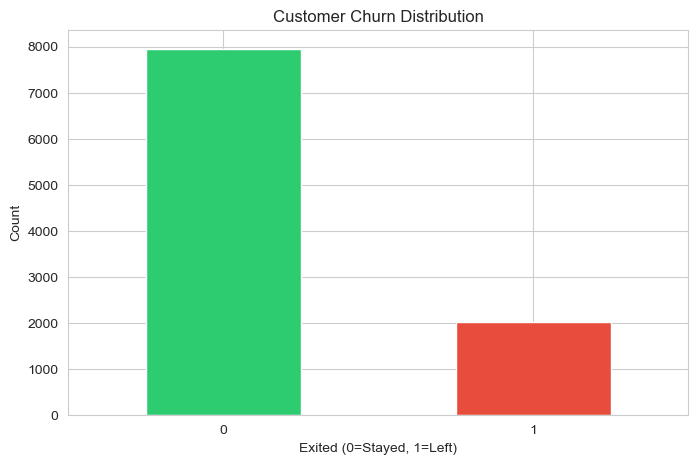

Churn Rate: 20.37%


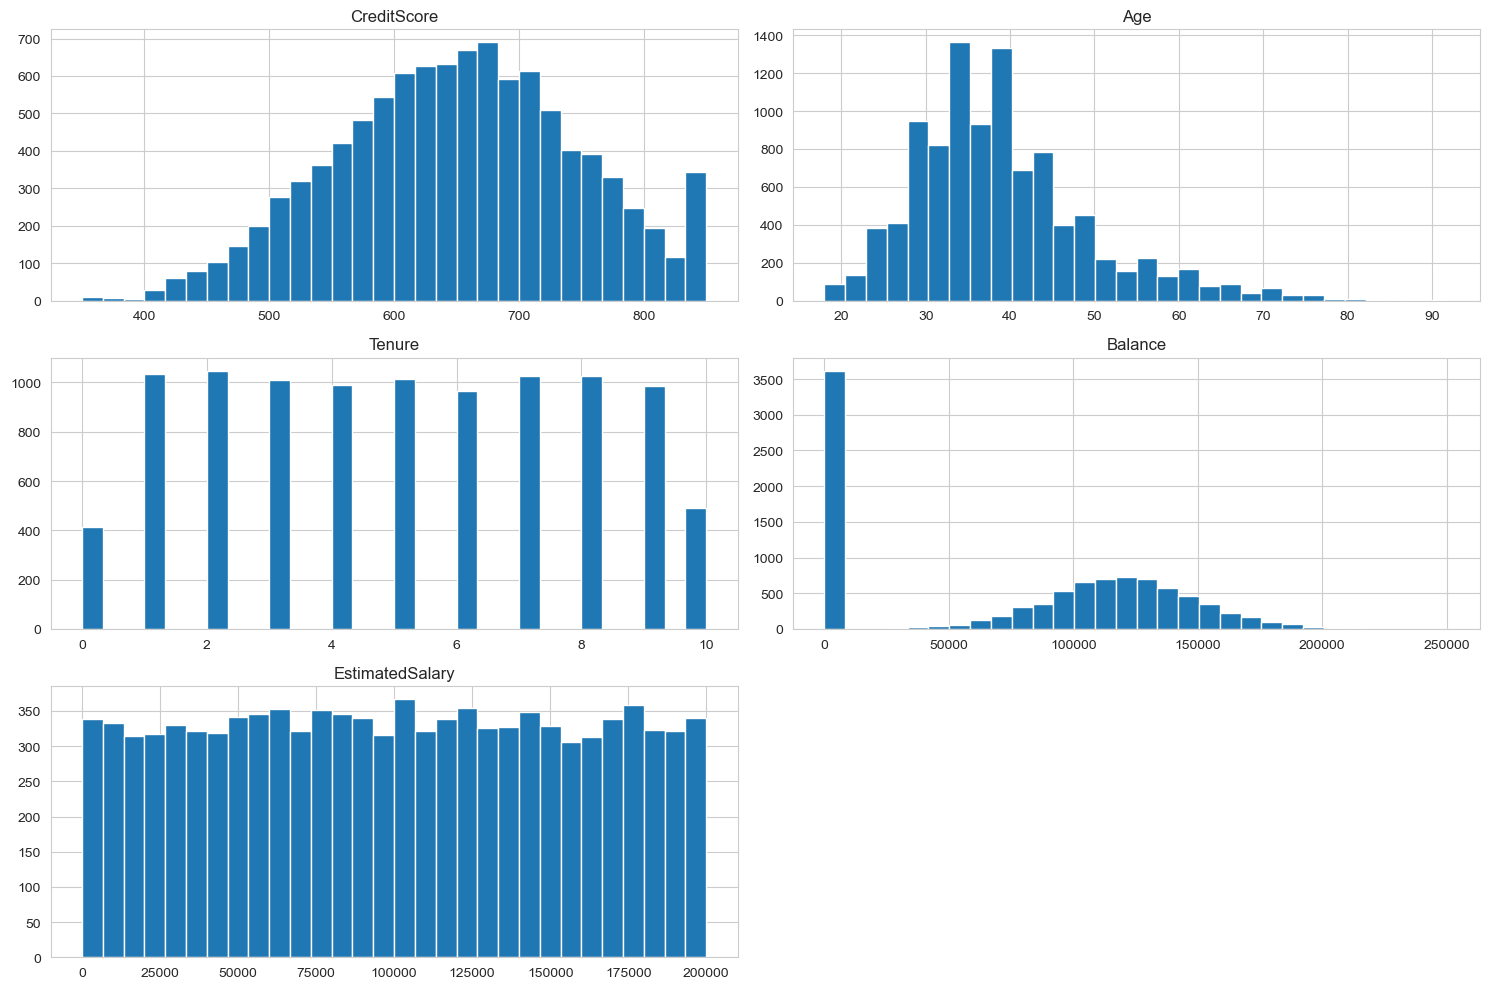

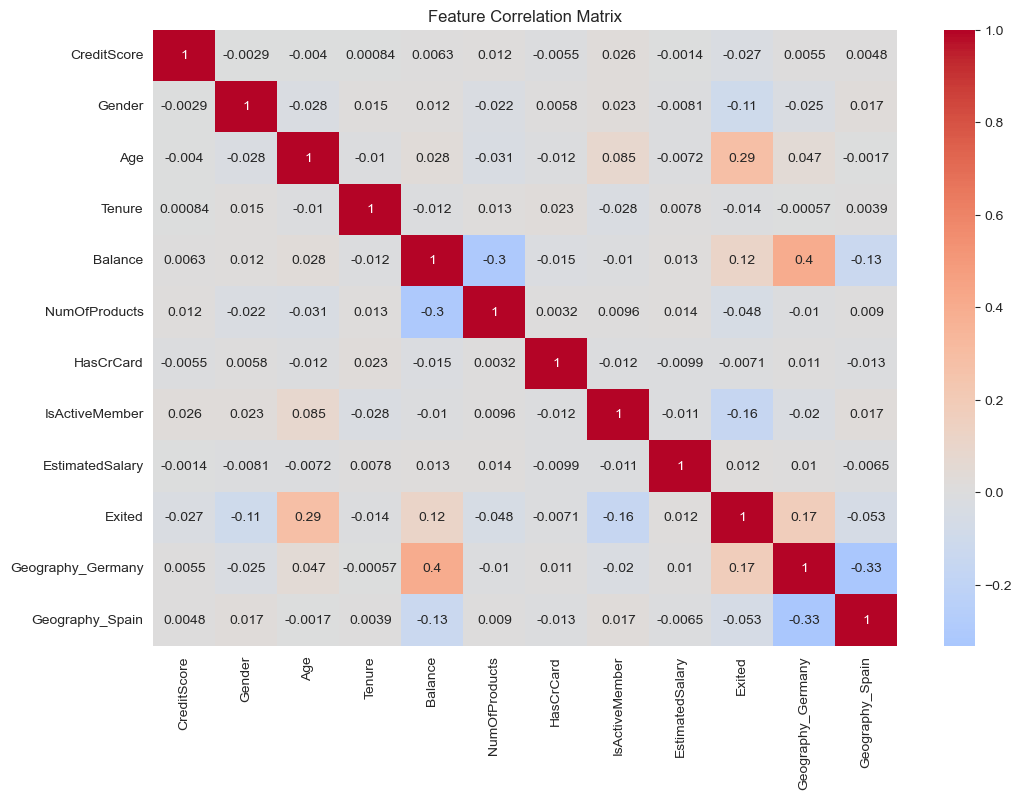

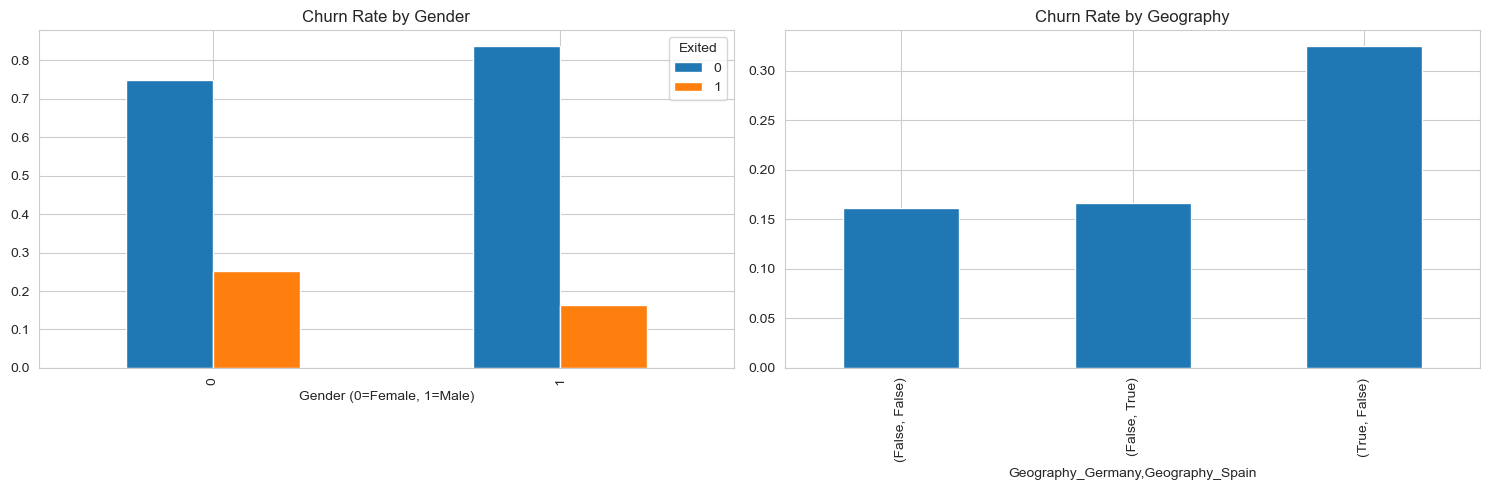

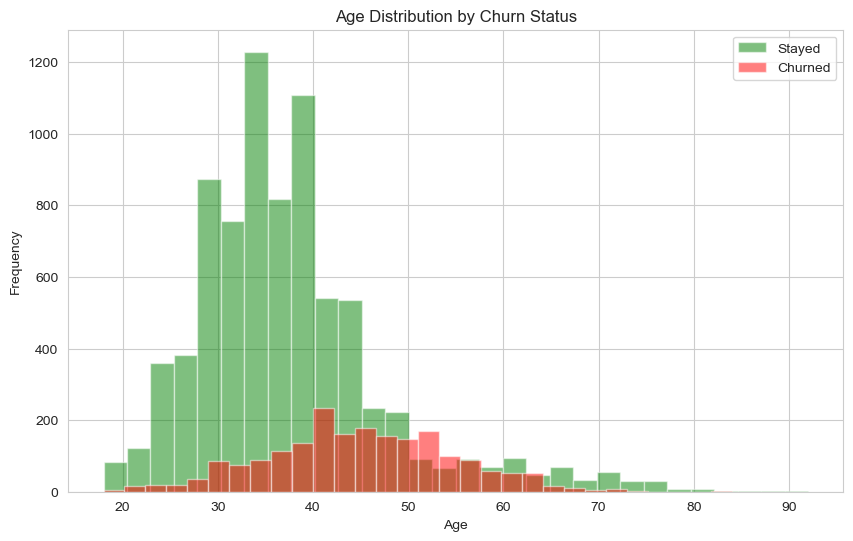

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Target variable distribution
plt.figure(figsize=(8, 5))
df['Exited'].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Customer Churn Distribution')
plt.xlabel('Exited (0=Stayed, 1=Left)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

print(f"Churn Rate: {df['Exited'].mean()*100:.2f}%")

# 2. Numerical features distribution
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
df[numerical_features].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# 3. Correlation matrix
plt.figure(figsize=(12, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

# 4. Churn by categorical features
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gender vs Churn
pd.crosstab(df['Gender'], df['Exited'], normalize='index').plot(kind='bar', ax=axes[0])
axes[0].set_title('Churn Rate by Gender')
axes[0].set_xlabel('Gender (0=Female, 1=Male)')

# Geography vs Churn
geo_churn = df.groupby(['Geography_Germany', 'Geography_Spain'])['Exited'].mean()
geo_churn.plot(kind='bar', ax=axes[1])
axes[1].set_title('Churn Rate by Geography')

plt.tight_layout()
plt.show()

# 5. Age distribution by churn
plt.figure(figsize=(10, 6))
df[df['Exited']==0]['Age'].hist(bins=30, alpha=0.5, label='Stayed', color='green')
df[df['Exited']==1]['Age'].hist(bins=30, alpha=0.5, label='Churned', color='red')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Churn Status')
plt.legend()
plt.show()

In [12]:
# Create new features
df['BalanceToSalary'] = df['Balance'] / (df['EstimatedSalary'] + 1)
df['TenureAgeRatio'] = df['Tenure'] / (df['Age'] + 1)
df['IsZeroBalance'] = (df['Balance'] == 0).astype(int)

# Age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 100], 
                         labels=['Young', 'Middle', 'Senior', 'Elderly'])
df = pd.get_dummies(df, columns=['AgeGroup'], drop_first=True)

print("New features created successfully!")
df.head()

New features created successfully!


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,BalanceToSalary,TenureAgeRatio,IsZeroBalance,AgeGroup_Middle,AgeGroup_Senior,AgeGroup_Elderly
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False,0.000000,0.046512,1,False,True,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True,0.744670,0.023810,0,False,True,False
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False,1.401362,0.186047,0,False,True,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False,0.000000,0.025000,1,True,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True,1.587035,0.045455,0,False,True,False


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

# Prepare data
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models dictionary
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Training {name}...")
    
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Metrics
    accuracy = model.score(X_test_scaled, y_test)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'cv_mean': cv_scores.mean(),
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"\nAccuracy: {accuracy:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"Cross-validation mean: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
    print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")


Training Logistic Regression...

Accuracy: 0.8270
ROC-AUC: 0.7905
Cross-validation mean: 0.8226 (+/- 0.0068)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1593
           1       0.70      0.26      0.38       407

    accuracy                           0.83      2000
   macro avg       0.77      0.62      0.64      2000
weighted avg       0.81      0.83      0.79      2000


Training Random Forest...

Accuracy: 0.8620
ROC-AUC: 0.8518
Cross-validation mean: 0.8599 (+/- 0.0063)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.78      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000


Training Gradient Boosting...

Accuracy: 0.8690
ROC-AUC: 0.8700
Cross-validation me

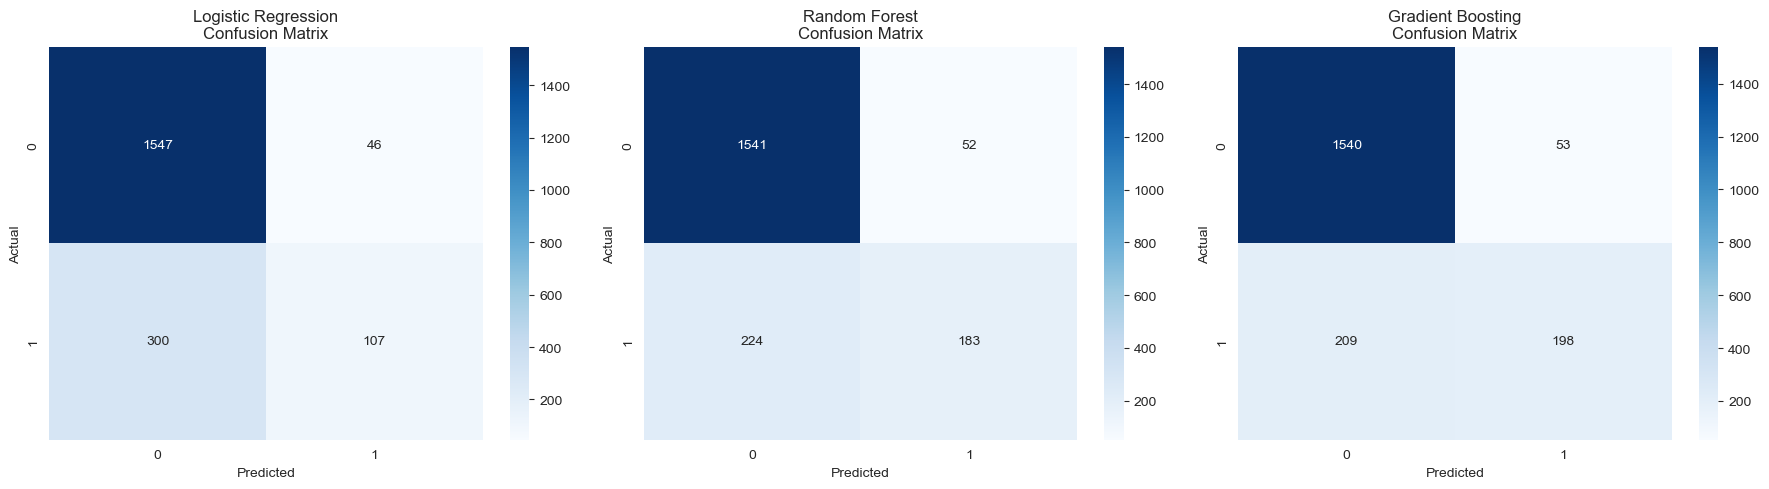

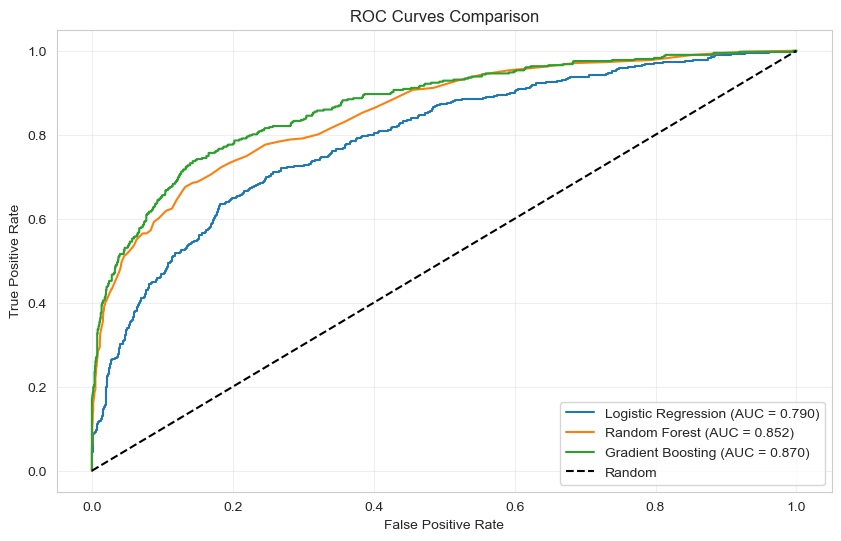


Model Comparison:
              Model  Accuracy  ROC-AUC  CV Score
Logistic Regression     0.827 0.790485  0.822625
      Random Forest     0.862 0.851750  0.859875
  Gradient Boosting     0.869 0.869972  0.863625


In [14]:
# Confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[idx], cmap='Blues')
    axes[idx].set_title(f'{name}\nConfusion Matrix')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# ROC Curves
plt.figure(figsize=(10, 6))

for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {result['roc_auc']:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Model comparison
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [r['accuracy'] for r in results.values()],
    'ROC-AUC': [r['roc_auc'] for r in results.values()],
    'CV Score': [r['cv_mean'] for r in results.values()]
})

print("\nModel Comparison:")
print(comparison_df.to_string(index=False))

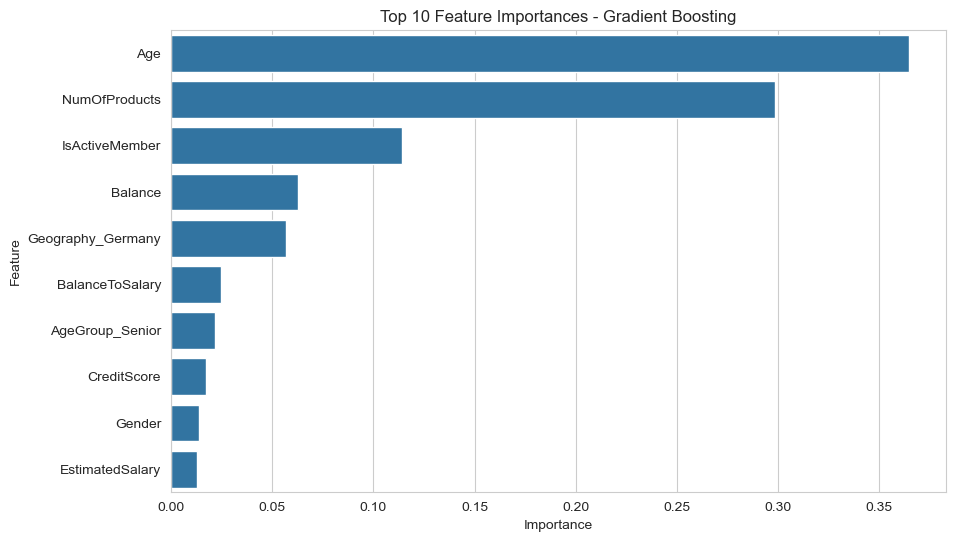


Top 10 Important Features:
          Feature  Importance
              Age    0.364624
    NumOfProducts    0.298494
   IsActiveMember    0.113942
          Balance    0.062883
Geography_Germany    0.056618
  BalanceToSalary    0.024624
  AgeGroup_Senior    0.021674
      CreditScore    0.017403
           Gender    0.013646
  EstimatedSalary    0.012744


In [15]:
# Get best model (Random Forest or Gradient Boosting)
best_model_name = max(results, key=lambda x: results[x]['roc_auc'])
best_model = results[best_model_name]['model']

if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature')
    plt.title(f'Top 10 Feature Importances - {best_model_name}')
    plt.show()
    
    print("\nTop 10 Important Features:")
    print(feature_importance.head(10).to_string(index=False))

In [16]:
# Create age groups for analysis
age_bins = [0, 30, 40, 50, 100]
age_labels = ['18-30', '31-40', '41-50', '50+']
age_groups = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
age_churn_rates = df.groupby(age_groups, observed=False)['Exited'].mean()
high_risk_age = age_churn_rates.idxmax()

# Calculate churn by gender
female_churn = df[df['Gender']==0]['Exited'].mean() * 100
male_churn = df[df['Gender']==1]['Exited'].mean() * 100

# Print insights
print("\n" + "="*60)
print("KEY INSIGHTS & BUSINESS RECOMMENDATIONS")
print("="*60)

print("\n1. CHURN ANALYSIS:")
print(f"   - Overall churn rate: {df['Exited'].mean()*100:.2f}%")
print(f"   - High-risk age group: {high_risk_age} ({age_churn_rates[high_risk_age]*100:.1f}% churn)")
print(f"   - Churn by gender: Female: {female_churn:.1f}%, Male: {male_churn:.1f}%")

print("\n2. MODEL PERFORMANCE:")
print(f"   - Best performing model: {best_model_name}")
print(f"   - ROC-AUC Score: {results[best_model_name]['roc_auc']:.4f}")
print(f"   - Model accuracy: {results[best_model_name]['accuracy']*100:.1f}%")

print("\n3. BUSINESS RECOMMENDATIONS:")
print(f"   - Focus retention efforts on {high_risk_age} age group")
print(f"   - {'Female' if female_churn > male_churn else 'Male'} customers show higher churn - investigate reasons")
print(f"   - Model can identify {results[best_model_name]['roc_auc']*100:.1f}% of at-risk customers")

print("\n" + "="*60)


KEY INSIGHTS & BUSINESS RECOMMENDATIONS

1. CHURN ANALYSIS:
   - Overall churn rate: 20.37%
   - High-risk age group: 50+ (44.6% churn)
   - Churn by gender: Female: 25.1%, Male: 16.5%

2. MODEL PERFORMANCE:
   - Best performing model: Gradient Boosting
   - ROC-AUC Score: 0.8700
   - Model accuracy: 86.9%

3. BUSINESS RECOMMENDATIONS:
   - Focus retention efforts on 50+ age group
   - Female customers show higher churn - investigate reasons
   - Model can identify 87.0% of at-risk customers



In [17]:
# Save processed data
df.to_csv('processed_customer_data.csv', index=False)

# Save model
import joblib
joblib.dump(best_model, f'{best_model_name.replace(" ", "_")}_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("\nAll results saved successfully!")


All results saved successfully!
